In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.finnhub.data import FinnhubData as finnhub
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [3]:
ticker = 'DRRX'

fh = finnhub()
data = fh.get_historical_data(ticker, fh.get_daily_closings, days = 180)

data.index = data['t']
data.sort_index()
data.drop_duplicates()

,t,o,l,h,c,v
t,,,,,,
2020-09-16 20:00:00,2020-09-16 20:00:00,1.77,1.77,1.77,1.77,107439
2020-09-17 20:00:00,2020-09-17 20:00:00,1.76,1.76,1.76,1.76,27021
2020-09-18 20:00:00,2020-09-18 20:00:00,1.85,1.85,1.85,1.85,450509
2020-09-21 20:00:00,2020-09-21 20:00:00,1.75,1.75,1.75,1.75,111730
2020-09-22 20:00:00,2020-09-22 20:00:00,1.70,1.76,1.70,1.76,30666
...,...,...,...,...,...,...
2021-03-09 21:00:00,2021-03-09 21:00:00,2.13,2.13,2.13,2.13,61921
2021-03-10 21:00:00,2021-03-10 21:00:00,2.12,2.12,2.12,2.12,76568
2021-03-11 21:00:00,2021-03-11 21:00:00,2.21,2.21,2.21,2.21,102964


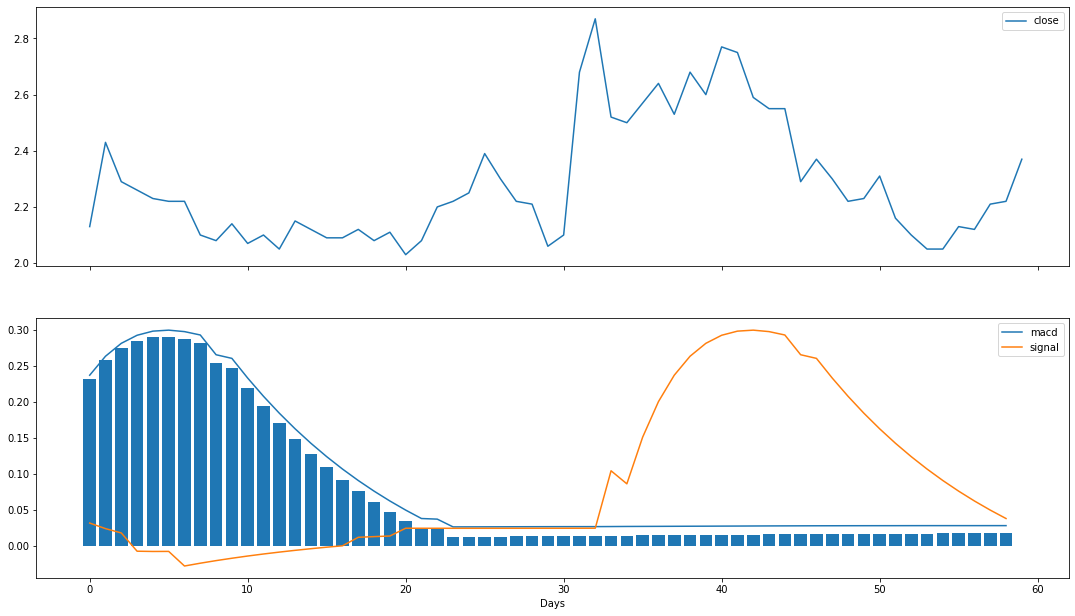

In [4]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

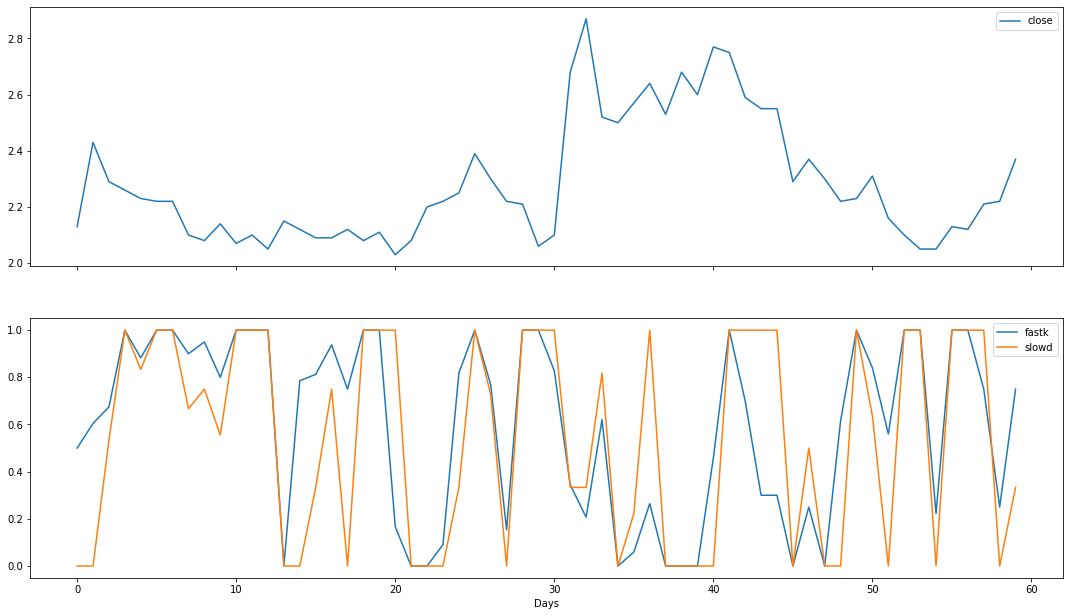

In [5]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)